In [4]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

In [5]:
mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1) # result is an rv object (which stands for random variable)

mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

In [14]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

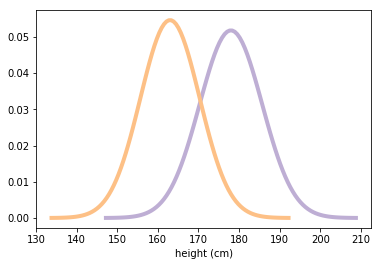

In [15]:
xs, ys = eval_pdf(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4')

xs, ys = eval_pdf(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
None

## Samples

In [17]:
male_sample = male_height.rvs(1000) # result is NumPy array
female_sample = female_height.rvs(1000)

mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.54543902681849, 7.676557544768652)

In [18]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.042589766259, 7.1756257460681026)

## Estimation of $\mu$ and $\sigma^2$ from Samples

In [29]:
mean, var = 0, 0
for i in range(100):
    male_sample = male_height.rvs(100)
    m, v = male_sample.mean(), male_sample.var()
    mean += m
    var += v

print('true mean:', male_height.mean())
print('expectation of mean:', mean/100)
print('true variance:', male_height.var())
print('expectation of variance:', var/100)

true mean: 178.0
expectation of mean: 177.91918087874535
true std: 59.290000000000006
expectation of std: 59.033451164395245


## Explaination

### 期望

上面我们每次抽样选取 100 人的身高，供进行了 100 次抽样.

每次抽取的样本 $X_1, X_2, ... X_{100}$ 是随机向量，则样本均值 $\bar{X} = \frac{X_1 + X_2 + ... + X_{100}}{n}$ 是随机变量.

虽然 $\bar{X}$ 的取值具有偶然性，有时比 $E(X)$ 大， 有时比 $E(X)$ 小，但是有以下定理：

$$E(\bar{X}) = E(X)$$

这是因为：

$E(\bar{X}) = E(\frac{X_1+X_2+...+X_{100}}{n}) = \frac{1}{n}[E(X_1) + E(X_2) + ... + E(X_{100})] = E(X)$

最后一个等式是因为 $X_1, X_2, ... X_{100}$ 都是随机变量（抽取的第1,2,...,100人的身高），它们与 $X$ 具有相同的概率分布，从而期望也相等.

**也就是说，用 $\bar{X}$ 估计 $E(X)$ 没有系统偏差.** (想象靶心是 $E(X)$，$\bar{X}$可能会分布在靶心周围，但是其均值正中靶心)

记 $\bar{X}_n = \frac{1}{n}(X_1+X_2+...+X_n)$，则 $\bar{X}_1$ 和 $\bar{X}_2$ 作为 $E(X)$ 的估计量都没有系统偏差，但是 $\bar{X}_2$ 要比 $\bar{X}_1$ 好，这是因为 $D(\bar{X}_1) > D(\bar{X}_2)$：

$D(\bar{X}_n) = \frac{D(X)}{n}$

也就是说，我们样本均值的方差，是总体方差的 $\frac{1}{n}$，$n$ 为样本大小，证明：

$D(\bar{X}_n) = \frac{1}{n^2}[D(X_1) + D(X_2) + ... + D(X_n)] = \frac{D(X)}{n}$

因此，样本大小 $n$ 越大，$D(\bar{X})$ 就越小，也即 $\bar{X}$ 对 $E(X)$ 的估计越好. (想象虽然均值正中靶心，但是离靶心距离差不多(方差小)和差很多(方差大)的情况.)

### 方差

我们把量 $\frac{1}{n-1}\sum\limits_{i=1}^{n}(X_i - \bar{X}^2)$ 叫做 **样本方差**. 记做 $S^2$ 或小写的 $s^2$

那么有定理：

$$E(S^2) = D(X)$$

其中 $D(X)$ 是总体方差.

证明如下：

$\sum\limits_{i=1}^{n}(X_i - \bar{X}^2) = \sum\limits_{i=1}^{n}(X_i^2 - 2X_i\bar{X} + \bar{X}^2) = \sum\limits_{i=1}^{n}X_i^2 - 2\bar{X}\sum\limits_{i=1}^{n}X_i + n\bar{X}^2 = \sum\limits_{i=1}^{n}X_i^2 - n\bar{X}^2$

于是：

$E(S^2) = E[\frac{1}{n-1}\sum\limits_{i=1}^{n}(X_i-\bar{X}^2)] = \frac{1}{n-1}\sum\limits_{i=1}^{n}E(X_i^2) - \frac{n}{n-1}E(\bar{X}^2) = \frac{n}{n-1}[E(X^2) - E(\bar{X}^2)]$

最后一步我们用到了：$E(E(X_i^2)) = E(X_i^2) =E(X)$, 这是因为 $X_i$ 和 $X$ 同分布. 

由于 $E(\eta^2) = D(\eta) + (E(\eta))^2$:

$E(S^2) = \frac{n}{n-1}\{D(X) + (E(X))^2 - [D(\bar{X}) + (E(\bar{X}))^2]\} = \frac{n}{n-1}[D(X) + (E(X))^2 - \frac{D(X)}{n} - (E(X))^2] = D(X)$

其中我们用到了：$D(\bar{X}) = \frac{D(X)}{n}, E(\bar{X}) = E(X)$

上面的定理告诉我们：**用 $S^2$ 估计方差 $D(X)$ 虽然有时大些，有时小些，但没有系统偏差.**

如果采用估计量：$\frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X})^2$，则这个估计量的期望等于 $\frac{n-1}{n}D(X)$，总比 $D(X)$ 要小. 不过当 $n$ 较大时，这个估计量与 $S^2$ 差异就不大了. 所以在 $n$ 比较大时，也常采用 $\frac{1}{n}\sum\limits_{i=1}^{n}(X_i-\bar{X})^2$ 作为 $D(X)$ 的估计量.

## Bayes' theorem